<h1 style='text-align:center; font-weight:bold'>
    Escalamiento de datos
</h1>

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import timeit

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model

## **1. Datos Númericos**

In [5]:
data = datasets.load_diabetes()

In [6]:
data['data'].shape

(442, 10)

In [7]:
X, y = datasets.load_diabetes(return_X_y=True) 

In [8]:
X.shape

(442, 10)

In [9]:
names = data.feature_names

In [10]:
df_X = pd.DataFrame(X)
df_X.columns=names

In [11]:
df_y = pd.DataFrame(y)
df_y.columns = ['Target']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=13)

In [13]:
raw = X[:, None, 2]

### **1.1 Transformaciones Lineales**

**Escalamiento Linear**: 
<ul>
    <li>
        <strong>¿Por qué usarlos?</strong> 
        <p>Algunos modelos de Machine Learning son más eficientes en el rango [-1, 1]</p>
    </li>
    <li>
        <strong>Hay diferentes tipos</strong> 
        <p>max-min, Z-Score, Clipping, Winsorizing, etc.</p>
    </li>
    <li>
        <strong>¿Cuándo usarlos?</strong> 
        <p>Cuando la data es simétrica o esta uniformemente distribuida</p>        
    </li>
</ul>

#### **A) Máximo-Minimo**

In [14]:
max_raw = raw.max()
min_raw = raw.min()

In [15]:
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

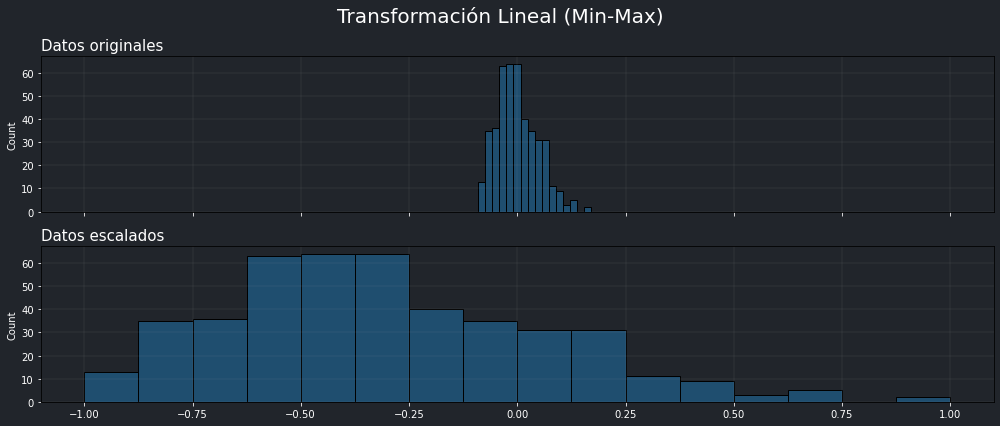

In [16]:
fig, ax = plt.subplots(2,1, figsize=(14, 6), sharex=True)

fig.suptitle('Transformación Lineal (Min-Max)', color='white', fontsize=20)
fig.patch.set_facecolor('#21252b') 

# Primer gráfico
sns.histplot(raw, ax=ax[0])
ax[0].set_title('Datos originales', color='white', fontsize=15, loc='left')

# Segundo gráfico
sns.histplot(scaled, ax=ax[1])
ax[1].set_title('Datos escalados', color='white', fontsize=15, loc='left')

for i in range(2):
    ax[i].set_facecolor('#21252b') 
    ax[i].grid(linewidth=0.1)
    ax[i].get_legend().remove()
    ax[i].yaxis.label.set_color('white')
    ax[i].tick_params(axis='x', labelcolor='white', color='white')
    ax[i].tick_params(axis='y', labelcolor='white', color='white')
    
fig.tight_layout()
plt.show()

**Modelo**

In [17]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

In [18]:
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [19]:
raw_time = timeit.timeit(train_raw, number=10000)
scaled_time = timeit.timeit(train_scaled, number=10000)

**Comparamos los tiempos de cada modelo**

In [20]:
round(raw_time, 2), round(scaled_time, 2)

(3.93, 4.24)

#### **B) Máximo-Minimo (Sklearn)**

In [21]:
penguins = sns.load_dataset('penguins')

data = penguins[['flipper_length_mm']]
data.columns = ['Original']

In [22]:
scaler = MinMaxScaler()

In [23]:
minMaxScaler = MinMaxScaler(
    feature_range=(-1, 1)
)

minMaxScaler.fit(data)

MinMaxScaler(feature_range=(-1, 1))

In [24]:
data['Transformada'] = minMaxScaler.transform(data)

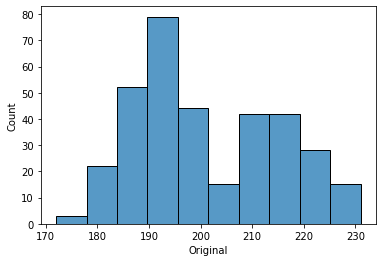

In [25]:
sns.histplot(data['Original'])
plt.show()

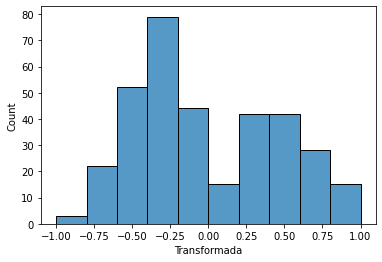

In [26]:
sns.histplot(data['Transformada'])
plt.show()

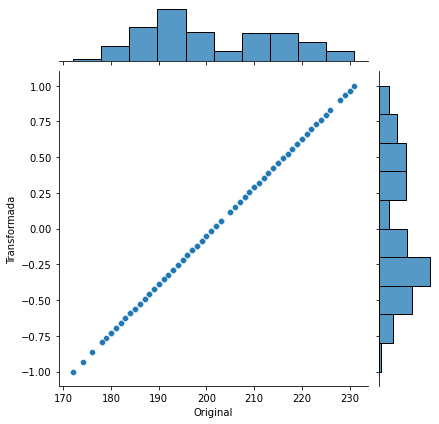

In [27]:
sns.jointplot(data=data, x='Original', y='Transformada')
plt.show()

#### **C) Standar Scaler (Z-Score)**

In [28]:
z_score = (raw-raw.mean())/raw.std()

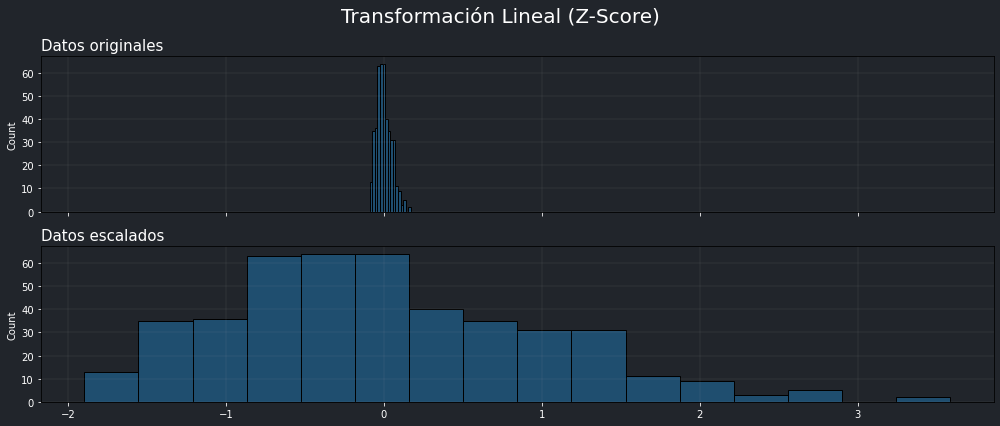

In [29]:
fig, ax = plt.subplots(2,1, figsize=(14, 6), sharex=True)

fig.suptitle('Transformación Lineal (Z-Score)', color='white', fontsize=20)
fig.patch.set_facecolor('#21252b') 

# Primer gráfico
sns.histplot(raw, ax=ax[0])
ax[0].set_title('Datos originales', color='white', fontsize=15, loc='left')

# Segundo gráfico
sns.histplot(z_score, ax=ax[1])
ax[1].set_title('Datos escalados', color='white', fontsize=15, loc='left')

for i in range(2):
    ax[i].set_facecolor('#21252b') 
    ax[i].grid(linewidth=0.1)
    ax[i].get_legend().remove()
    ax[i].yaxis.label.set_color('white')
    ax[i].tick_params(axis='x', labelcolor='white', color='white')
    ax[i].tick_params(axis='y', labelcolor='white', color='white')
    
fig.tight_layout()
plt.show()

### **1.2 Transformaciones no lineales**

<ul>
    <li>
        <strong>¿Por qué usarlos?</strong> 
        <p>Lo usamos cuando nuestros datos estan fuertemente sesgados, no son simetricos.</p>
    </li>
    <li>
        <strong>Hay diferentes tipos</strong> 
        <p>Logaritmos, sigmoides, polinomiales, etc.</p>
    </li>
    <li>
        <strong>¿Cuándo usarlos?</strong> 
        <p>Antes de hacer escalamientos lineales</p>        
    </li>
</ul>

In [30]:
df = pd.read_csv('Data/cars.csv')

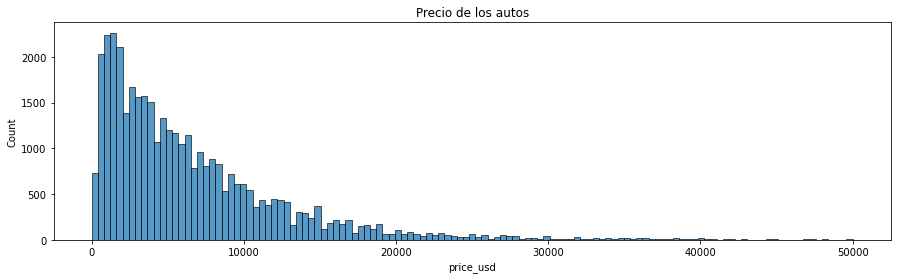

In [31]:
plt.figure(figsize=(15,4))
plt.title('Precio de los autos')
sns.histplot(data=df, x='price_usd', legend=False)
plt.show()

**Tangente hiperbolica**

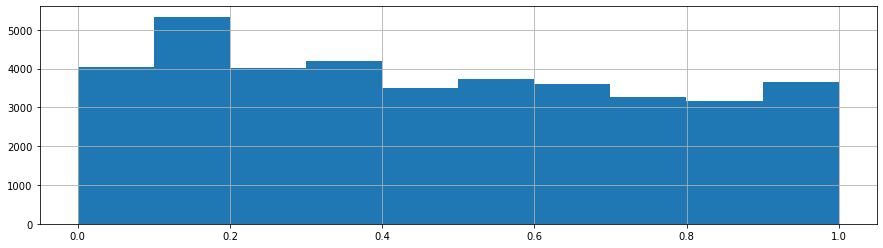

In [32]:
p = 10000

plt.figure(figsize=(15,4))
df['price_usd'].apply(lambda x: np.tanh(x/p)).hist()
plt.show()

## **2. Datos Categóricos**

### **2.1 Mapeos numéricos**

#### **A) Dummies**

- Represenación compacta.
- Mejor para inputs linealmente independientes.

In [46]:
df['engine_type'].value_counts()

gasoline    25647
diesel      12874
electric       10
Name: engine_type, dtype: int64

In [44]:
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


#### **B) One-hot**

- Permite describir categorías no incluidas inicialmente

In [48]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [52]:
encoder.fit(df[['engine_type']])

OneHotEncoder(handle_unknown='ignore')

In [56]:
encoder.transform([['gasoline'], ['diesel'], ['oil']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])